In [60]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import folium as fm
from shapely.geometry import Polygon

from math import radians, asin, sqrt, sin, cos, log, log10

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from collections import Counter

from IPython.core.display import Markdown, display, HTML

In [3]:
# beautify the screen display
%matplotlib inline
pd.options.display.max_columns = 200
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
  .rendered_html tr, .rendered_html th,  .rendered_html td {   text-align: right; }  
  .rendered_html :first-child {   text-align: left; } 
  .rendered_html :last-child {   text-align: left; }
  </style>"""))

# Tweak default output of pyplots
screen_dpi = plt.rcParams['figure.dpi']
# 'figsize' is in inches, so convert desired default figure size in pixels into inches using the given sceen dpi 
plt.rcParams["figure.figsize"] = [800/screen_dpi,600/screen_dpi]

In [4]:
# 12-step qualitative color scale, courtesy of www.colorbrewer2.org
# clust_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
clust_colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0']

In [42]:
df = pd.DataFrame({'a': [1, 2], 'b': [3, 4]})
df.max(axis=0)
df.div(df.max(axis=1), axis=0)

a    b
0  0.333333  1.0
1  0.500000  1.0

In [43]:
df.head()

a  b
0  1  3
1  2  4

In [5]:
zones = pd.read_csv('Dataset/Processed/Zone 1-3.csv', index_col='Id')
# zones = zones['Id']
zones.head()

Zone
Id      
30     1
42     1
40     1
43     1
13     1

In [6]:
# comparison = pd.read_csv('Dataset/Processed/hourly_comparison.csv', sep=',', decimal='.', header=0, index_col='id', dtype=np.float64)
comparison = pd.read_csv('Dataset/Processed/hourly_comparison.csv', sep=',', decimal='.', header=0, index_col='id')

comparison = comparison.join(zones, how='inner').drop('Zone', axis=1)

comparison.head()

1         2         3         4         5         6         7  \
1 -0.031963 -0.005128 -0.042945 -0.235294 -0.227273 -0.310345 -0.339286   
2  0.571429  0.621053  0.375000  0.090909  0.120000  0.200000  0.000000   
3 -0.087719 -0.387755 -0.260870 -0.421053 -0.500000 -0.560976 -0.567568   
4  0.574468  0.412844  0.333333  0.296296  0.130435  0.347826  0.282051   
5  0.424658  0.428571  0.380952  0.450000  0.393939  0.428571  0.294118   

          8         9        10        11        12        13        14  \
1 -0.371901 -0.220588 -0.234973 -0.180488 -0.147059 -0.116981 -0.026393   
2 -0.076923  0.234043  0.084746  0.179487  0.320000  0.321429  0.352113   
3 -0.395349 -0.652174 -0.295775 -0.268817 -0.341176 -0.104762 -0.133333   
4  0.173913  0.187500 -0.055556  0.313131  0.462069  0.412935  0.477064   
5  0.245283  0.147541  0.127273  0.097744  0.103448  0.244681  0.196911   

         15        16        17        18        19        20        21  \
1  0.056604  0.000000  0.053191  0.002342 -0.016787  0.020225  0.097046   
2  0.467391  0.388535  0.242105  0.277228  0.192661  0.198473  0.140351   
3 -0.055556  0.014706  0.000000 -0.067568 -0.253521 -0.105590 -0.140351   
4  0.484536  0.432990  0.492386  0.486486  0.366516  0.338521  0.400844   
5  0.232787  0.183521  0.168919  0.256140  0.150000  0.089109 -0.074627   

         22        23        24        25        26        27        28  \
1 -0.051429 -0.028090 -0.042345 -0.082707 -0.079498 -0.184783 -0.226190   
2  0.140097  0.039548  0.161677  0.124183  0.200000 -0.065217 -0.102564   
3 -0.132743 -0.075630 -0.142857 -0.123596 -0.200000 -0.243243 -0.490909   
4  0.257919  0.410138  0.430108  0.358974  0.468531  0.354839  0.370787   
5  0.162011  0.087500  0.200000  0.179104  0.094017  0.120000  0.046512   

         29        30        31        32        33        34        35  \
1 -0.224490 -0.251799 -0.246377 -0.211268 -0.171975 -0.181347 -0.161290   
2 -0.283582 -0.242424 -0.409836 -0.164179 -0.258427 -0.076923 -0.034965   
3 -0.471698 -0.593750 -0.592593 -0.507692 -0.428571 -0.371901 -0.165217   
4  0.348315  0.324324  0.311475  0.314286  0.213483  0.179487  0.355932   
5  0.012658  0.025641  0.063291  0.105882 -0.040000 -0.125828  0.041237   

         36        37        38        39        40        41        42  \
1 -0.078067  0.003390 -0.028249  0.008310  0.025070  0.119318  0.000000   
2  0.041420  0.215686  0.096774  0.180617  0.161538  0.156522  0.039301   
3 -0.028169 -0.051852 -0.006369 -0.102564  0.114943  0.119048 -0.005587   
4  0.333333  0.355932  0.315508  0.383260  0.305936  0.330233  0.292453   
5  0.162304  0.161017  0.179487  0.084848  0.247649  0.244300  0.277978   

         43        44        45        46        47        48        49  \
1  0.051136 -0.075630  0.007673  0.000000 -0.029703 -0.006623  0.078261   
2  0.102881 -0.107692  0.025641 -0.022831 -0.023810  0.022989  0.128834   
3 -0.087500 -0.058824 -0.188406 -0.206349 -0.089109 -0.212766 -0.305263   
4  0.265116  0.333333  0.359649  0.357798  0.401015  0.333333  0.516779   
5  0.273469  0.031111  0.111111  0.091954  0.186207  0.301370  0.295082   

         50        51        52        53        54        55        56  \
1 -0.087912 -0.195122 -0.202614 -0.184615 -0.228346 -0.280000 -0.265625   
2 -0.090909 -0.083333 -0.316456 -0.428571 -0.411765 -0.388889 -0.307692   
3 -0.257143 -0.294118 -0.403509 -0.344262 -0.523810 -0.491525 -0.432836   
4  0.394958  0.358025  0.304348  0.290323  0.225806  0.281250  0.313433   
5  0.303571  0.200000  0.185185  0.180723  0.160494  0.170732  0.093023   

         57        58        59        60        61        62        63  \
1 -0.173913 -0.229947 -0.162393 -0.058333 -0.070922 -0.010381  0.028249   
2 -0.224490 -0.159420 -0.170068 -0.016760  0.064677  0.092308  0.166667   
3 -0.493671 -0.423729 -0.244755 -0.099415  0.029240 -0.034884 -0.116279   
4  0.120879  0.027027  0.112782  0.279503  0.260116  0.242718  0.278539   
5  0.096154  0.042945 -0.03

In [44]:
residents = pd.read_csv('Dataset/Processed/hourly_residents_normal.csv', sep=',', decimal='.', header=0, index_col='id')
residents = residents.join(zones, how='inner').drop('Zone', axis=1)
# residents = residents.div(residents.max(axis=0), axis=0)
residents.head()

1         2         3         4         5         6         7  \
1  0.389655  0.337931  0.293103  0.289655  0.279310  0.262069  0.258621   
2  0.187500  0.125000  0.104167  0.104167  0.076389  0.083333  0.083333   
3  0.322917  0.354167  0.302083  0.281250  0.281250  0.333333  0.302083   
4  0.315789  0.336842  0.252632  0.200000  0.210526  0.157895  0.147368   
5  0.125000  0.095238  0.077381  0.065476  0.059524  0.059524  0.071429   

          8         9        10        11        12        13        14  \
1  0.286207  0.286207  0.389655  0.417241  0.537931  0.510345  0.603448   
2  0.097222  0.125000  0.187500  0.222222  0.236111  0.263889  0.319444   
3  0.312500  0.395833  0.479167  0.614583  0.593750  0.604167  0.708333   
4  0.200000  0.273684  0.600000  0.357895  0.410526  0.621053  0.600000   
5  0.119048  0.154762  0.285714  0.357143  0.464286  0.422619  0.619048   

         15        16        17        18        19        20        21  \
1  0.603448  0.682759  0.613793  0.734483  0.731034  0.751724  0.737931   
2  0.340278  0.333333  0.500000  0.506944  0.611111  0.729167  0.680556   
3  0.791667  0.697917  0.718750  0.822917  0.927083  0.927083  0.677083   
4  0.526316  0.578947  0.526316  0.600000  0.736842  0.894737  0.747368   
5  0.696429  0.648810  0.732143  0.630952  0.607143  0.547619  0.642857   

         22        23        24        25        26        27        28  \
1  0.634483  0.631034  0.551724  0.496552  0.444828  0.375862  0.355172   
2  0.618056  0.590278  0.486111  0.465278  0.375000  0.340278  0.298611   
3  0.666667  0.666667  0.625000  0.520833  0.500000  0.479167  0.427083   
4  0.863158  0.673684  0.557895  0.526316  0.400000  0.315789  0.294737   
5  0.446429  0.434524  0.357143  0.327381  0.315476  0.261905  0.244048   

         29        30        31        32        33        34        35  \
1  0.310345  0.300000  0.296552  0.296552  0.317241  0.393103  0.496552   
2  0.298611  0.284722  0.298611  0.270833  0.388889  0.486111  0.513889   
3  0.406250  0.531250  0.447917  0.510417  0.572917  0.864583  0.697917   
4  0.305263  0.263158  0.221053  0.252632  0.368421  0.505263  0.400000   
5  0.232143  0.226190  0.220238  0.226190  0.309524  0.505952  0.553571   

         36        37        38        39        40        41        42  \
1  0.500000  0.506897  0.627586  0.617241  0.603448  0.534483  0.655172   
2  0.562500  0.555556  0.680556  0.645833  0.756944  0.673611  0.763889   
3  0.760417  0.739583  0.822917  0.895833  0.802083  0.770833  0.937500   
4  0.526316  0.600000  0.673684  0.736842  0.800000  0.757895  0.789474   
5  0.476190  0.589286  0.761905  0.898810  0.714286  0.690476  0.595238   

         43        44        45        46        47        48        49  \
1  0.575862  0.662069  0.668966  0.541379  0.537931  0.524138  0.365517   
2  0.756944  1.000000  0.791667  0.777778  0.597222  0.590278  0.493056   
3  0.906250  0.937500  0.854167  0.791667  0.572917  0.593750  0.645833   
4  0.831579  0.873684  0.768421  0.736842  0.621053  0.621053  0.378947   
5  0.529762  0.648810  0.571429  0.470238  0.351190  0.303571  0.255952   

         50        51        52        53        54        55        56  \
1  0.341379  0.337931  0.317241  0.265517  0.268966  0.275862  0.279310   
2  0.458333  0.361111  0.361111  0.347222  0.333333  0.347222  0.354167   
3  0.458333  0.458333  0.416667  0.427083  0.500000  0.458333  0.500000   
4  0.378947  0.273684  0.252632  0.231579  0.252632  0.242105  0.242105   
5  0.232143  0.214286  0.196429  0.202381  0.202381  0.202381  0.232143   

         57        58        59        60        61        62        63  \
1  0.279310  0.396552  0.468966  0.437931  0.520690  0.503448  0.593103   
2  0.416667  0.555556  0.597222  0.631944  0.652778  0.819444  0.694444   
3  0.614583  0.875000  0.927083  0.979167  0.864583  0.927083  1.000000   
4  0.421053  0.568421  0.621053  0.610526  0.673684  0.821053  0.831579   
5  0.279762  0.464286  0.66

In [45]:
visitors = pd.read_csv('Dataset/Processed/hourly_visitors_normal.csv', sep=',', decimal='.', header=0, index_col='id')
visitors = visitors.join(zones, how='inner').drop('Zone', axis=1)
# visitors = visitors.div(visitors.max(axis=0), axis=0)
visitors.head()

1         2         3         4         5         6         7  \
1  0.304598  0.278736  0.224138  0.149425  0.146552  0.114943  0.106322   
2  0.630573  0.490446  0.210191  0.114650  0.089172  0.114650  0.076433   
3  0.268041  0.154639  0.175258  0.113402  0.092784  0.092784  0.082474   
4  0.521127  0.361502  0.225352  0.164319  0.122066  0.145540  0.117371   
5  0.237443  0.182648  0.132420  0.132420  0.105023  0.114155  0.100457   

          8         9        10        11        12        13        14  \
1  0.109195  0.152299  0.201149  0.241379  0.333333  0.336207  0.477011   
2  0.076433  0.184713  0.203822  0.292994  0.420382  0.471338  0.611465   
3  0.134021  0.082474  0.257732  0.350515  0.288660  0.484536  0.536082   
4  0.126761  0.178404  0.239437  0.305164  0.497653  0.666667  0.755869   
5  0.150685  0.159817  0.283105  0.333333  0.438356  0.534247  0.707763   

         15        16        17        18        19        20        21  \
1  0.563218  0.568966  0.568966  0.614943  0.589080  0.652299  0.747126   
2  0.859873  0.694268  0.751592  0.821656  0.828025  1.000000  0.828025   
3  0.701031  0.711340  0.711340  0.711340  0.546392  0.742268  0.505155   
4  0.676056  0.652582  0.690141  0.774648  0.708920  0.807512  0.779343   
5  0.858447  0.721461  0.789954  0.817352  0.630137  0.502283  0.424658   

         22        23        24        25        26        27        28  \
1  0.477011  0.497126  0.422414  0.350575  0.316092  0.215517  0.186782   
2  0.751592  0.585987  0.617834  0.547771  0.515924  0.273885  0.222930   
3  0.505155  0.567010  0.463918  0.402062  0.329897  0.288660  0.144330   
4  0.652582  0.718310  0.624413  0.497653  0.492958  0.295775  0.286385   
5  0.474886  0.397260  0.410959  0.360731  0.292237  0.255708  0.205479   

         29        30        31        32        33        34        35  \
1  0.163793  0.149425  0.149425  0.160920  0.186782  0.227011  0.298851   
2  0.152866  0.159236  0.114650  0.178344  0.210191  0.382166  0.439490   
3  0.144330  0.134021  0.113402  0.164948  0.226804  0.391753  0.494845   
4  0.281690  0.230047  0.187793  0.215962  0.253521  0.323944  0.375587   
5  0.182648  0.182648  0.191781  0.214612  0.219178  0.301370  0.461187   

         36        37        38        39        40        41        42  \
1  0.356322  0.425287  0.494253  0.522989  0.528736  0.566092  0.545977   
2  0.560510  0.789809  0.757962  0.853503  0.961783  0.847134  0.757962   
3  0.711340  0.659794  0.804124  0.721649  1.000000  0.969072  0.917526   
4  0.469484  0.563380  0.577465  0.737089  0.671362  0.671362  0.643192   
5  0.506849  0.625571  0.840183  0.817352  0.908676  0.872146  0.808219   

         43        44        45        46        47        48        49  \
1  0.531609  0.474138  0.566092  0.451149  0.422414  0.431034  0.356322   
2  0.853503  0.738854  0.764331  0.681529  0.522293  0.566879  0.585987   
3  0.752577  0.824742  0.577320  0.515464  0.474227  0.381443  0.340206   
4  0.638498  0.779343  0.727700  0.694836  0.647887  0.553991  0.530516   
5  0.712329  0.529680  0.547945  0.433790  0.392694  0.433790  0.360731   

         50        51        52        53        54        55        56  \
1  0.238506  0.189655  0.175287  0.152299  0.140805  0.129310  0.135057   
2  0.350318  0.280255  0.171975  0.127389  0.127389  0.140127  0.171975   
3  0.268041  0.247423  0.175258  0.206186  0.154639  0.154639  0.195876   
4  0.389671  0.258216  0.211268  0.187793  0.178404  0.192488  0.206573   
5  0.333333  0.246575  0.219178  0.223744  0.214612  0.219178  0.214612   

         57        58        59        60        61        62        63  \
1  0.163793  0.206897  0.281609  0.324713  0.376437  0.410920  0.522989   
2  0.242038  0.369427  0.388535  0.560510  0.681529  0.904459  0.891720   
3  0.206186  0.350515  0.556701  0.793814  0.907216  0.855670  0.783505   
4  0.239437  0.267606  0.347418  0.483568  0.511737  0.600939  0.657277   
5  0.260274  0.388128  0.47

In [29]:
division_geo = gpd.read_file('Dataset/Processed/London_division.shp', driver="ESRI Shapefile")
division_geo.head()

id               name      area  \
0   1   Trafalgar Square  0.277425   
1   2            Big Ben  0.399994   
2   3  Parliament Square  0.236767   
3   4         London Eye  0.425408   
4   5        Tate Modern  0.686323   

                                            geometry  
0  POLYGON ((-0.1304619 51.50952, -0.12742117 51....  
1  POLYGON ((-0.12498988 51.503284, -0.12284501 5...  
2  POLYGON ((-0.12562872 51.502274, -0.124708146 ...  
3  POLYGON ((-0.12235283 51.503895, -0.119325526 ...  
4  POLYGON ((-0.0996684 51.51117, -0.095774494 51...

In [46]:
interval_median_comparison = comparison.median(skipna=True)
interval_median_residents = residents.median(skipna=True)
interval_median_visitors = visitors.median(skipna=True)


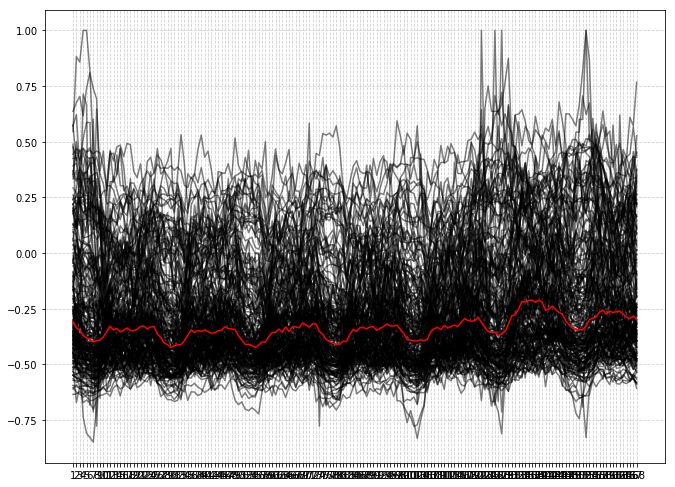

In [47]:
fig, ax = plt.subplots()

for index, row in comparison.iterrows():
    ax.plot(comparison.columns, row, color='#00000080', label=row.name)

ax.plot(comparison.columns, interval_median_comparison, color='red')

ax.yaxis.grid(color='#D0D0D0', linestyle='--')

ax.set_xticks(comparison.columns)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
    
ax.xaxis.grid(color='#D0D0D0', linestyle='--')

plt.show()

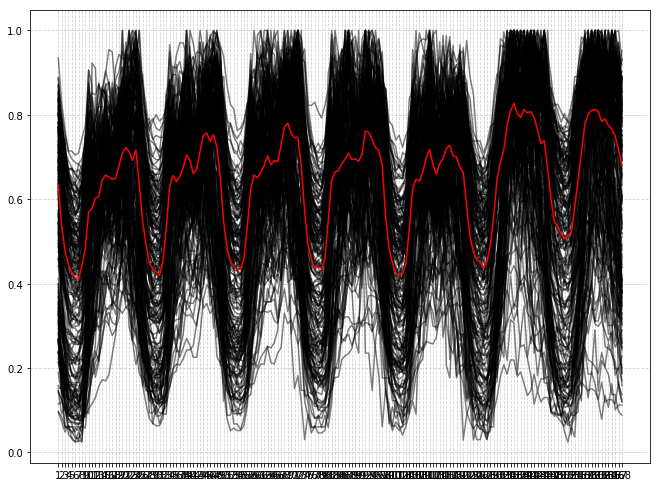

In [48]:
fig, ax = plt.subplots()

for index, row in visitors.iterrows():
    ax.plot(visitors.columns, row, color='#00000080', label=row.name)

ax.plot(visitors.columns, interval_median_visitors, color='red')

ax.yaxis.grid(color='#D0D0D0', linestyle='--')

ax.set_xticks(visitors.columns)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
    
ax.xaxis.grid(color='#D0D0D0', linestyle='--')

plt.show()

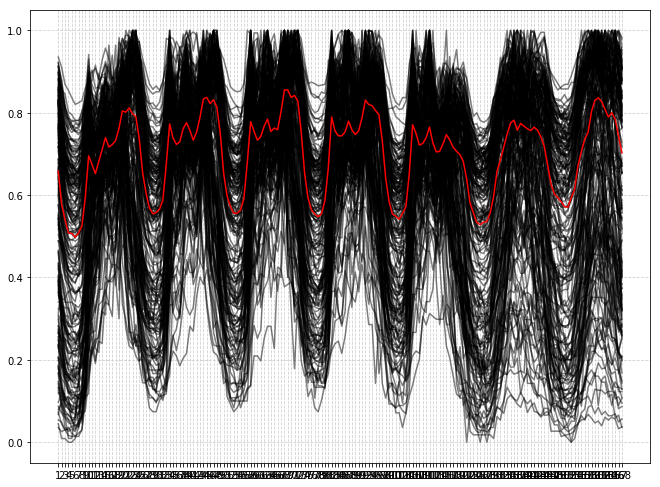

In [49]:
fig, ax = plt.subplots()

for index, row in residents.iterrows():
    ax.plot(residents.columns, row, color='#00000080', label=row.name)

ax.plot(residents.columns, interval_median_residents, color='red')

ax.yaxis.grid(color='#D0D0D0', linestyle='--')

ax.set_xticks(residents.columns)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
    
ax.xaxis.grid(color='#D0D0D0', linestyle='--')

plt.show()

In [14]:
mod_steps = 167

def uncluterred_plot(time_series):
    interval_min = time_series.min(skipna=True)
    interval_max = time_series.max(skipna=True)
    interval_mean = time_series.mean(skipna=True)
    interval_median = time_series.median(skipna=True)

    quantile_borders = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    int_quantiles = time_series.quantile(quantile_borders).T

    quant_color_dark  = '#B0B0B0FF'
    quant_color_light = '#F0F0F0FF'
    quant_range_colors = [quant_color_light, quant_color_dark]

    fig, axs = plt.subplots(1, 2, figsize=(1200/screen_dpi,400/screen_dpi))

    ###### First (left) subplot
    ax = axs[0]
    for i in range(1, len(quantile_borders)):
        ax.fill_between(int_quantiles.index, int_quantiles[quantile_borders[i-1]], int_quantiles[quantile_borders[i]], facecolor=quant_range_colors[i%2])

    ax.plot(interval_min.index, interval_min, color=quant_color_dark)
    ax.plot(interval_max.index, interval_max, color=quant_color_dark)

    legend_handles = [None, None] # Manually collect relevant legend handles, so we can suppress that every single (auto-labeled) decentile element gets crammed into the legend
    legend_handles[0], = ax.plot(interval_mean.index, interval_mean, color='blue')
    legend_handles[1], = ax.plot(interval_median.index, interval_median, color='red')

    # Draw a subtle reference grid
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')

    # X-axis tick labels might need a little bit of help to look nicely
    ax.set_xticks(int_quantiles.index)
    #for i, tick in enumerate(ax.get_xticklabels()):
    #    tick.set_label(str(int_quantiles.index))
    #    tick.set_rotation(45)

    ax.set_title('Per-cell time series')

    ax.set_xlim(0, mod_steps)
    ax.set_ylim(0)

    ###### Second (right) subplot
    ax = axs[1]
    for i in range(1, len(quantile_borders)):
        ax.fill_between(int_quantiles.index, int_quantiles[quantile_borders[i-1]], int_quantiles[quantile_borders[i]], facecolor=quant_range_colors[i%2])

    ax.plot(interval_min.index, interval_min, color=quant_color_dark)
    ax.plot(interval_max.index, interval_max, color=quant_color_dark)

    legend_handles = [None, None] # Manually collect relevant legend handles, so we can suppress that every single (auto-labeled) decentile element gets crammed into the legend
    legend_handles[0], = ax.plot(interval_mean.index, interval_mean, color='blue')
    legend_handles[1], = ax.plot(interval_median.index, interval_median, color='red')

    # Draw a subtle reference grid
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')

    # X-axis tick labels might need a little bit of help to look nicely
    ax.set_xticks(int_quantiles.index)
    #for i, tick in enumerate(ax.get_xticklabels()):
    #    tick.set_label(str(int_quantiles.index))
    #    tick.set_rotation(45)

    ax.set_title('Low-value range details')

    ax.set_xlim(0, mod_steps)
    # Zoom the plot on the low values range for more details
    ax.set_ylim(0, 100)

    ###### Joint legend
    labels = ['Mean', 'Median']
    ax.legend(handles=legend_handles, title='Reference Time Series', labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()

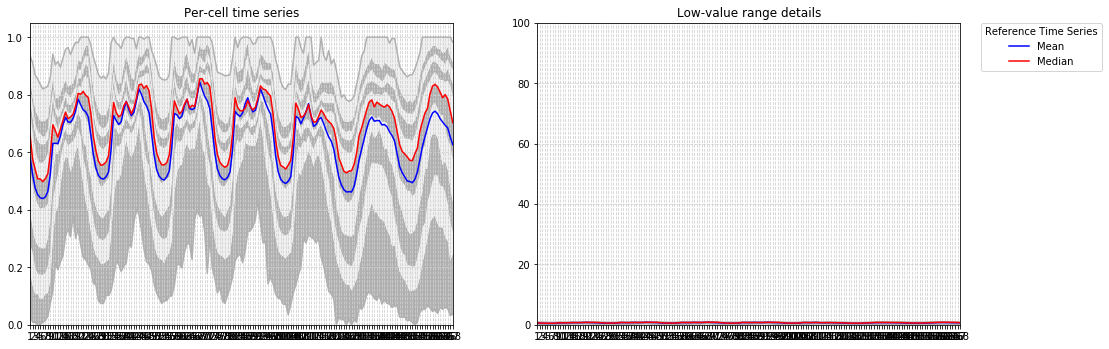

In [50]:
uncluterred_plot(residents)

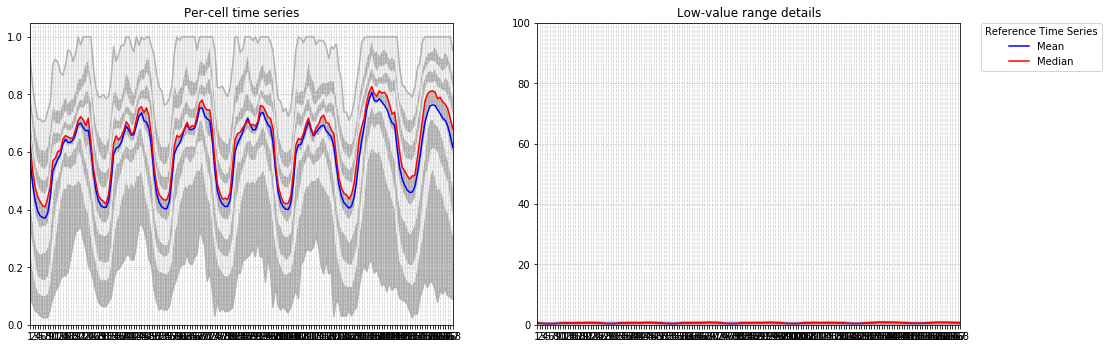

In [51]:
uncluterred_plot(visitors)

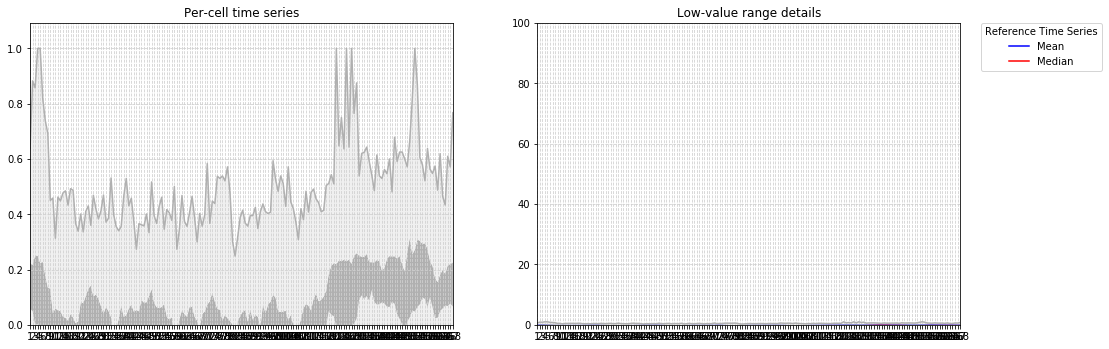

In [17]:
uncluterred_plot(comparison)

In [52]:
k = 5 # 12 is tthe upper limit for k, as ColorBrewer's color scale has 12 colors only.

# clust_id_col_name = 'Cluster ID (k={})'.format(k)
clust_id_col_name = 'Cluster ID'

# time_series.head()

In [53]:
def clusterize(series):    
    kmeans = KMeans(n_clusters=k, random_state=42)
    clus = kmeans.fit(series)
#     clus = kmeans.fit(series.drop([clust_id_col_name], axis=1))
    clustered_series = series.copy()
    clustered_series[clust_id_col_name] = clus.labels_
    
#     centroids = pd.DataFrame(data=clus.cluster_centers_, columns=series.drop([clust_id_col_name], axis=1).columns)
#     print(series.drop([clust_id_col_name], axis=1).columns)
    centroids = pd.DataFrame(data=clus.cluster_centers_, columns=series.columns)
    cluster_sizes = Counter(clus.labels_)
    for cid, cnt in cluster_sizes.items():
        cluster_sizes[cid] = (cnt, log10(cnt) + 1)

    return (clustered_series, centroids, cluster_sizes)

In [54]:
# cluster_sizes = Counter(clus.labels_)
# for cid, cnt in cluster_sizes.items():
#     cluster_sizes[cid] = (cnt, log10(cnt) + 1)

In [55]:
(residents, residents_centroids, residents_cluster_sizes) = clusterize(residents)
residents.to_csv('Dataset/clustered_residents.csv', index_label='id')
residents.head()

1         2         3         4         5         6         7  \
1  0.389655  0.337931  0.293103  0.289655  0.279310  0.262069  0.258621   
2  0.187500  0.125000  0.104167  0.104167  0.076389  0.083333  0.083333   
3  0.322917  0.354167  0.302083  0.281250  0.281250  0.333333  0.302083   
4  0.315789  0.336842  0.252632  0.200000  0.210526  0.157895  0.147368   
5  0.125000  0.095238  0.077381  0.065476  0.059524  0.059524  0.071429   

          8         9        10        11        12        13        14  \
1  0.286207  0.286207  0.389655  0.417241  0.537931  0.510345  0.603448   
2  0.097222  0.125000  0.187500  0.222222  0.236111  0.263889  0.319444   
3  0.312500  0.395833  0.479167  0.614583  0.593750  0.604167  0.708333   
4  0.200000  0.273684  0.600000  0.357895  0.410526  0.621053  0.600000   
5  0.119048  0.154762  0.285714  0.357143  0.464286  0.422619  0.619048   

         15        16        17        18        19        20        21  \
1  0.603448  0.682759  0.613793  0.734483  0.731034  0.751724  0.737931   
2  0.340278  0.333333  0.500000  0.506944  0.611111  0.729167  0.680556   
3  0.791667  0.697917  0.718750  0.822917  0.927083  0.927083  0.677083   
4  0.526316  0.578947  0.526316  0.600000  0.736842  0.894737  0.747368   
5  0.696429  0.648810  0.732143  0.630952  0.607143  0.547619  0.642857   

         22        23        24        25        26        27        28  \
1  0.634483  0.631034  0.551724  0.496552  0.444828  0.375862  0.355172   
2  0.618056  0.590278  0.486111  0.465278  0.375000  0.340278  0.298611   
3  0.666667  0.666667  0.625000  0.520833  0.500000  0.479167  0.427083   
4  0.863158  0.673684  0.557895  0.526316  0.400000  0.315789  0.294737   
5  0.446429  0.434524  0.357143  0.327381  0.315476  0.261905  0.244048   

         29        30        31        32        33        34        35  \
1  0.310345  0.300000  0.296552  0.296552  0.317241  0.393103  0.496552   
2  0.298611  0.284722  0.298611  0.270833  0.388889  0.486111  0.513889   
3  0.406250  0.531250  0.447917  0.510417  0.572917  0.864583  0.697917   
4  0.305263  0.263158  0.221053  0.252632  0.368421  0.505263  0.400000   
5  0.232143  0.226190  0.220238  0.226190  0.309524  0.505952  0.553571   

         36        37        38        39        40        41        42  \
1  0.500000  0.506897  0.627586  0.617241  0.603448  0.534483  0.655172   
2  0.562500  0.555556  0.680556  0.645833  0.756944  0.673611  0.763889   
3  0.760417  0.739583  0.822917  0.895833  0.802083  0.770833  0.937500   
4  0.526316  0.600000  0.673684  0.736842  0.800000  0.757895  0.789474   
5  0.476190  0.589286  0.761905  0.898810  0.714286  0.690476  0.595238   

         43        44        45        46        47        48        49  \
1  0.575862  0.662069  0.668966  0.541379  0.537931  0.524138  0.365517   
2  0.756944  1.000000  0.791667  0.777778  0.597222  0.590278  0.493056   
3  0.906250  0.937500  0.854167  0.791667  0.572917  0.593750  0.645833   
4  0.831579  0.873684  0.768421  0.736842  0.621053  0.621053  0.378947   
5  0.529762  0.648810  0.571429  0.470238  0.351190  0.303571  0.255952   

         50        51        52        53        54        55        56  \
1  0.341379  0.337931  0.317241  0.265517  0.268966  0.275862  0.279310   
2  0.458333  0.361111  0.361111  0.347222  0.333333  0.347222  0.354167   
3  0.458333  0.458333  0.416667  0.427083  0.500000  0.458333  0.500000   
4  0.378947  0.273684  0.252632  0.231579  0.252632  0.242105  0.242105   
5  0.232143  0.214286  0.196429  0.202381  0.202381  0.202381  0.232143   

         57        58        59        60        61        62        63  \
1  0.279310  0.396552  0.468966  0.437931  0.520690  0.503448  0.593103   
2  0.416667  0.555556  0.597222  0.631944  0.652778  0.819444  0.694444   
3  0.614583  0.875000  0.927083  0.979167  0.864583  0.927083  1.000000   
4  0.421053  0.568421  0.621053  0.610526  0.673684  0.821053  0.831579   
5  0.279762  0.464286  0.66

In [56]:
(visitors, visitor_centroids, visitor_cluster_sizes) = clusterize(visitors)
visitors.to_csv('Dataset/clustered_visitors.csv', index_label='id')
visitors.head()

1         2         3         4         5         6         7  \
1  0.304598  0.278736  0.224138  0.149425  0.146552  0.114943  0.106322   
2  0.630573  0.490446  0.210191  0.114650  0.089172  0.114650  0.076433   
3  0.268041  0.154639  0.175258  0.113402  0.092784  0.092784  0.082474   
4  0.521127  0.361502  0.225352  0.164319  0.122066  0.145540  0.117371   
5  0.237443  0.182648  0.132420  0.132420  0.105023  0.114155  0.100457   

          8         9        10        11        12        13        14  \
1  0.109195  0.152299  0.201149  0.241379  0.333333  0.336207  0.477011   
2  0.076433  0.184713  0.203822  0.292994  0.420382  0.471338  0.611465   
3  0.134021  0.082474  0.257732  0.350515  0.288660  0.484536  0.536082   
4  0.126761  0.178404  0.239437  0.305164  0.497653  0.666667  0.755869   
5  0.150685  0.159817  0.283105  0.333333  0.438356  0.534247  0.707763   

         15        16        17        18        19        20        21  \
1  0.563218  0.568966  0.568966  0.614943  0.589080  0.652299  0.747126   
2  0.859873  0.694268  0.751592  0.821656  0.828025  1.000000  0.828025   
3  0.701031  0.711340  0.711340  0.711340  0.546392  0.742268  0.505155   
4  0.676056  0.652582  0.690141  0.774648  0.708920  0.807512  0.779343   
5  0.858447  0.721461  0.789954  0.817352  0.630137  0.502283  0.424658   

         22        23        24        25        26        27        28  \
1  0.477011  0.497126  0.422414  0.350575  0.316092  0.215517  0.186782   
2  0.751592  0.585987  0.617834  0.547771  0.515924  0.273885  0.222930   
3  0.505155  0.567010  0.463918  0.402062  0.329897  0.288660  0.144330   
4  0.652582  0.718310  0.624413  0.497653  0.492958  0.295775  0.286385   
5  0.474886  0.397260  0.410959  0.360731  0.292237  0.255708  0.205479   

         29        30        31        32        33        34        35  \
1  0.163793  0.149425  0.149425  0.160920  0.186782  0.227011  0.298851   
2  0.152866  0.159236  0.114650  0.178344  0.210191  0.382166  0.439490   
3  0.144330  0.134021  0.113402  0.164948  0.226804  0.391753  0.494845   
4  0.281690  0.230047  0.187793  0.215962  0.253521  0.323944  0.375587   
5  0.182648  0.182648  0.191781  0.214612  0.219178  0.301370  0.461187   

         36        37        38        39        40        41        42  \
1  0.356322  0.425287  0.494253  0.522989  0.528736  0.566092  0.545977   
2  0.560510  0.789809  0.757962  0.853503  0.961783  0.847134  0.757962   
3  0.711340  0.659794  0.804124  0.721649  1.000000  0.969072  0.917526   
4  0.469484  0.563380  0.577465  0.737089  0.671362  0.671362  0.643192   
5  0.506849  0.625571  0.840183  0.817352  0.908676  0.872146  0.808219   

         43        44        45        46        47        48        49  \
1  0.531609  0.474138  0.566092  0.451149  0.422414  0.431034  0.356322   
2  0.853503  0.738854  0.764331  0.681529  0.522293  0.566879  0.585987   
3  0.752577  0.824742  0.577320  0.515464  0.474227  0.381443  0.340206   
4  0.638498  0.779343  0.727700  0.694836  0.647887  0.553991  0.530516   
5  0.712329  0.529680  0.547945  0.433790  0.392694  0.433790  0.360731   

         50        51        52        53        54        55        56  \
1  0.238506  0.189655  0.175287  0.152299  0.140805  0.129310  0.135057   
2  0.350318  0.280255  0.171975  0.127389  0.127389  0.140127  0.171975   
3  0.268041  0.247423  0.175258  0.206186  0.154639  0.154639  0.195876   
4  0.389671  0.258216  0.211268  0.187793  0.178404  0.192488  0.206573   
5  0.333333  0.246575  0.219178  0.223744  0.214612  0.219178  0.214612   

         57        58        59        60        61        62        63  \
1  0.163793  0.206897  0.281609  0.324713  0.376437  0.410920  0.522989   
2  0.242038  0.369427  0.388535  0.560510  0.681529  0.904459  0.891720   
3  0.206186  0.350515  0.556701  0.793814  0.907216  0.855670  0.783505   
4  0.239437  0.267606  0.347418  0.483568  0.511737  0.600939  0.657277   
5  0.260274  0.388128  0.47

In [269]:
# # comparison = comparison.drop([clust_id_col_name], axis=1)
# (comparison_clustered, comparison_centroids, comparison_cluster_sizes) = clusterize(comparison)
# comparison_clustered.to_csv('Dataset/clustered_comparison_1.csv', index_label='id')
# comparison_clustered.head()

1         2         3         4         5         6         7  \
1 -0.031963 -0.005128 -0.042945 -0.235294 -0.227273 -0.310345 -0.339286   
2  0.571429  0.621053  0.375000  0.090909  0.120000  0.200000  0.000000   
3 -0.087719 -0.387755 -0.260870 -0.421053 -0.500000 -0.560976 -0.567568   
4  0.574468  0.412844  0.333333  0.296296  0.130435  0.347826  0.282051   
5  0.424658  0.428571  0.380952  0.450000  0.393939  0.428571  0.294118   

          8         9        10        11        12        13        14  \
1 -0.371901 -0.220588 -0.234973 -0.180488 -0.147059 -0.116981 -0.026393   
2 -0.076923  0.234043  0.084746  0.179487  0.320000  0.321429  0.352113   
3 -0.395349 -0.652174 -0.295775 -0.268817 -0.341176 -0.104762 -0.133333   
4  0.173913  0.187500 -0.055556  0.313131  0.462069  0.412935  0.477064   
5  0.245283  0.147541  0.127273  0.097744  0.103448  0.244681  0.196911   

         15        16        17        18        19        20        21  \
1  0.056604  0.000000  0.053191  0.002342 -0.016787  0.020225  0.097046   
2  0.467391  0.388535  0.242105  0.277228  0.192661  0.198473  0.140351   
3 -0.055556  0.014706  0.000000 -0.067568 -0.253521 -0.105590 -0.140351   
4  0.484536  0.432990  0.492386  0.486486  0.366516  0.338521  0.400844   
5  0.232787  0.183521  0.168919  0.256140  0.150000  0.089109 -0.074627   

         22        23        24        25        26        27        28  \
1 -0.051429 -0.028090 -0.042345 -0.082707 -0.079498 -0.184783 -0.226190   
2  0.140097  0.039548  0.161677  0.124183  0.200000 -0.065217 -0.102564   
3 -0.132743 -0.075630 -0.142857 -0.123596 -0.200000 -0.243243 -0.490909   
4  0.257919  0.410138  0.430108  0.358974  0.468531  0.354839  0.370787   
5  0.162011  0.087500  0.200000  0.179104  0.094017  0.120000  0.046512   

         29        30        31        32        33        34        35  \
1 -0.224490 -0.251799 -0.246377 -0.211268 -0.171975 -0.181347 -0.161290   
2 -0.283582 -0.242424 -0.409836 -0.164179 -0.258427 -0.076923 -0.034965   
3 -0.471698 -0.593750 -0.592593 -0.507692 -0.428571 -0.371901 -0.165217   
4  0.348315  0.324324  0.311475  0.314286  0.213483  0.179487  0.355932   
5  0.012658  0.025641  0.063291  0.105882 -0.040000 -0.125828  0.041237   

         36        37        38        39        40        41        42  \
1 -0.078067  0.003390 -0.028249  0.008310  0.025070  0.119318  0.000000   
2  0.041420  0.215686  0.096774  0.180617  0.161538  0.156522  0.039301   
3 -0.028169 -0.051852 -0.006369 -0.102564  0.114943  0.119048 -0.005587   
4  0.333333  0.355932  0.315508  0.383260  0.305936  0.330233  0.292453   
5  0.162304  0.161017  0.179487  0.084848  0.247649  0.244300  0.277978   

         43        44        45        46        47        48        49  \
1  0.051136 -0.075630  0.007673  0.000000 -0.029703 -0.006623  0.078261   
2  0.102881 -0.107692  0.025641 -0.022831 -0.023810  0.022989  0.128834   
3 -0.087500 -0.058824 -0.188406 -0.206349 -0.089109 -0.212766 -0.305263   
4  0.265116  0.333333  0.359649  0.357798  0.401015  0.333333  0.516779   
5  0.273469  0.031111  0.111111  0.091954  0.186207  0.301370  0.295082   

         50        51        52        53        54        55        56  \
1 -0.087912 -0.195122 -0.202614 -0.184615 -0.228346 -0.280000 -0.265625   
2 -0.090909 -0.083333 -0.316456 -0.428571 -0.411765 -0.388889 -0.307692   
3 -0.257143 -0.294118 -0.403509 -0.344262 -0.523810 -0.491525 -0.432836   
4  0.394958  0.358025  0.304348  0.290323  0.225806  0.281250  0.313433   
5  0.303571  0.200000  0.185185  0.180723  0.160494  0.170732  0.093023   

         57        58        59        60        61        62        63  \
1 -0.173913 -0.229947 -0.162393 -0.058333 -0.070922 -0.010381  0.028249   
2 -0.224490 -0.159420 -0.170068 -0.016760  0.064677  0.092308  0.166667   
3 -0.493671 -0.423729 -0.244755 -0.099415  0.029240 -0.034884 -0.116279   
4  0.120879  0.027027  0.112782  0.279503  0.260116  0.242718  0.278539   
5  0.096154  0.042945 -0.03

In [57]:
def plot_clusters(time_series, centroids, cluster_sizes, selected_clusters=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(1200/screen_dpi, 900/screen_dpi)

    # Select subset of clusters for detail comparison
    #selected_clusters = [0, 3, 5]
    # or use the next statement to display all clusters simultaneously
    if (selected_clusters is None):
        selected_clusters = [x for x in range(k)]

    x_vals = [x for x in range(mod_steps+1)]
    for index, row in time_series.iterrows():
        cluster_id = row[mod_steps+1]
        if (cluster_id < k and cluster_id in selected_clusters):
#             print(len(row))
#             print(clust_colors)
#             print(int(cluster_id))
#             print(clust_colors[int(cluster_id)])
#             ax.plot(x_vals, row[0:mod_steps+1], color=clust_colors[int(cluster_id)], alpha= 0.1, label=index)
            ax.plot(x_vals, row[0:mod_steps+1], color=clust_colors[int(cluster_id)-1], alpha= 0.2, label=index)

    legend_handles = [] # Manually collect relevant legend handles, so we can suppress that every single cell's label gets crammed into the legend
    for cluster_id, centroid in centroids.iterrows():
        if (cluster_id in selected_clusters):
            centroid_handle, = ax.plot(centroid.index, centroid, color=clust_colors[int(cluster_id)-1], alpha= 1.0, linewidth=2, label=cluster_id)
            legend_handles.append(centroid_handle)

#     ax.set_ylabel(target_col)
    ax.set_ylabel('Count')
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')
    ax.set_xticks(x_vals[::12])

#     ax.set_ylim(0, max_val)

    plt.title('Temporal Cluster Variance')

    labels = [None] * len(selected_clusters)
    for i, cid in enumerate(selected_clusters):
        labels[i] = '{:>2} ({:>4})'.format(cid, cluster_sizes[cid][0])

    plt.legend(handles=legend_handles, title='Cluster ID (Cluster size)', labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()

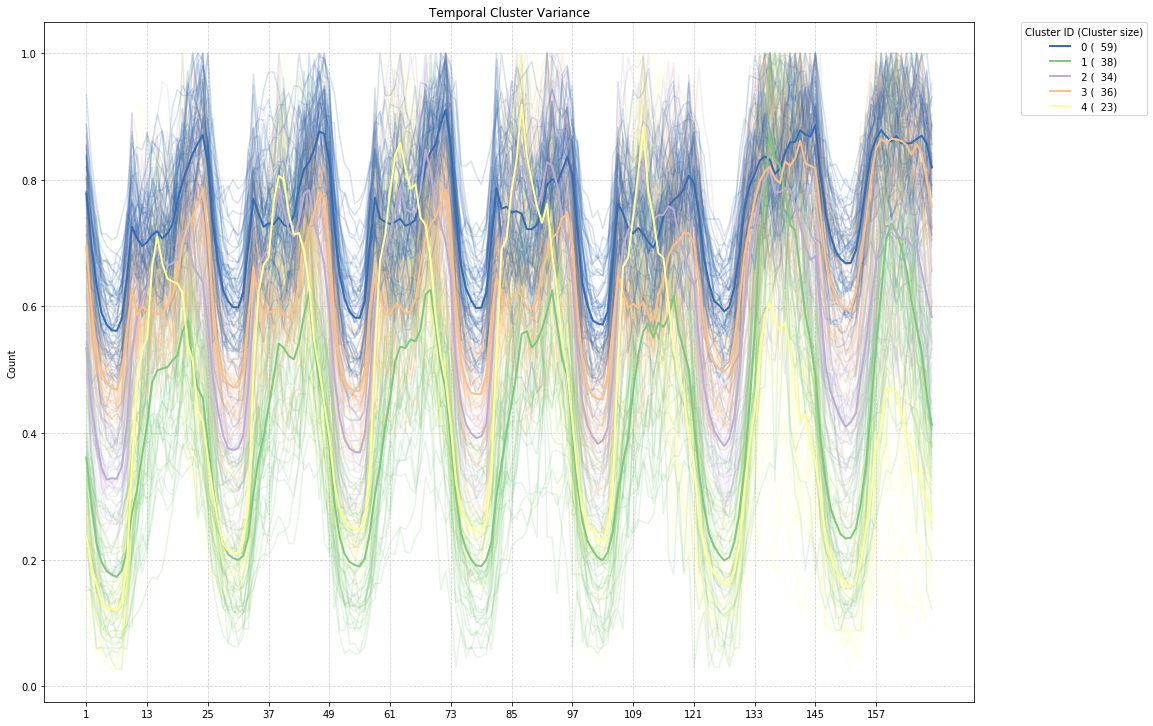

In [58]:
plot_clusters(visitors, visitor_centroids, visitor_cluster_sizes)

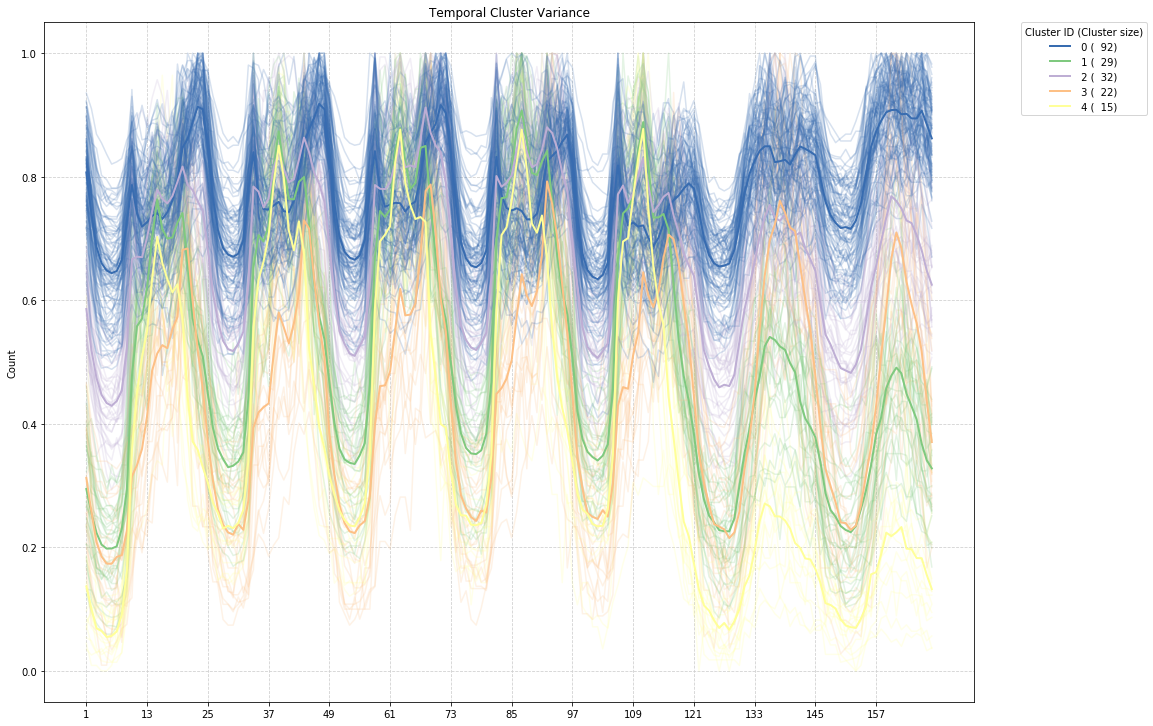

In [59]:
plot_clusters(residents, residents_centroids, residents_cluster_sizes)

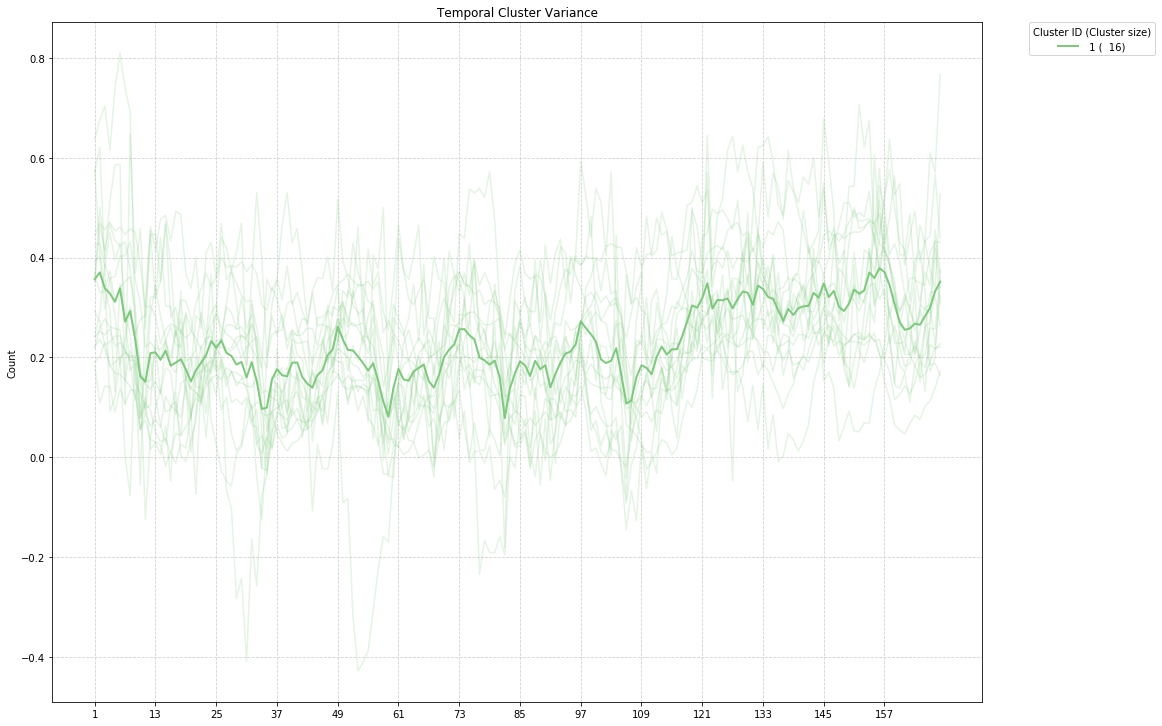

In [281]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [1])

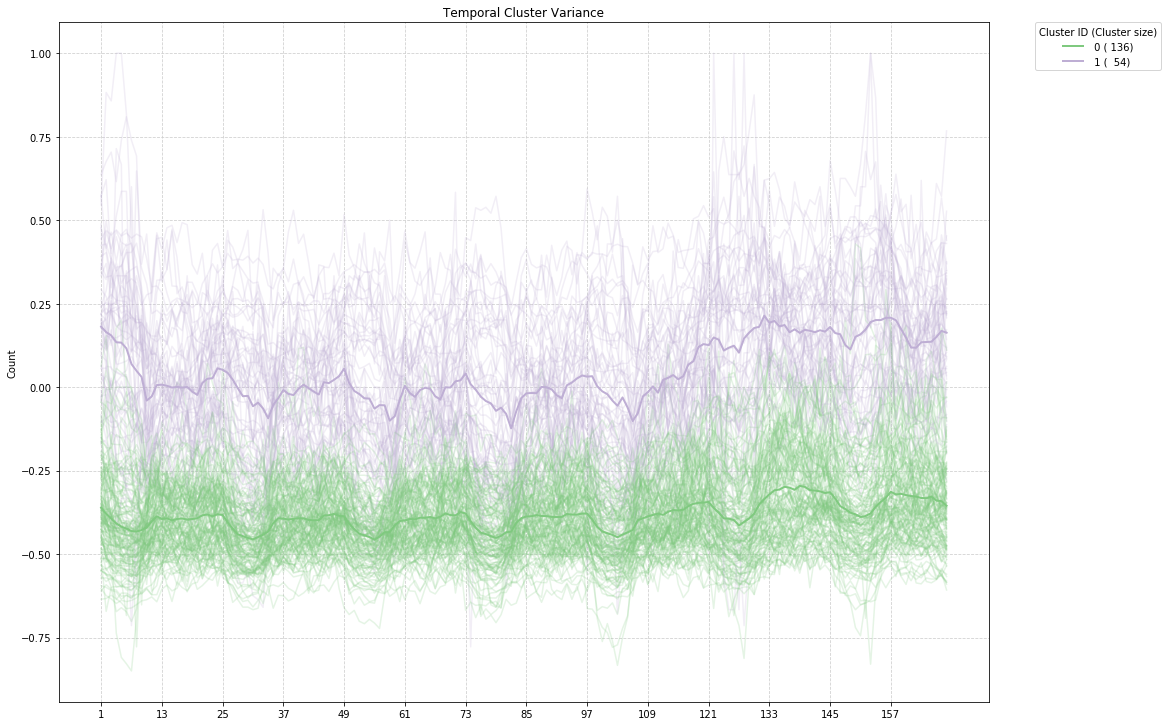

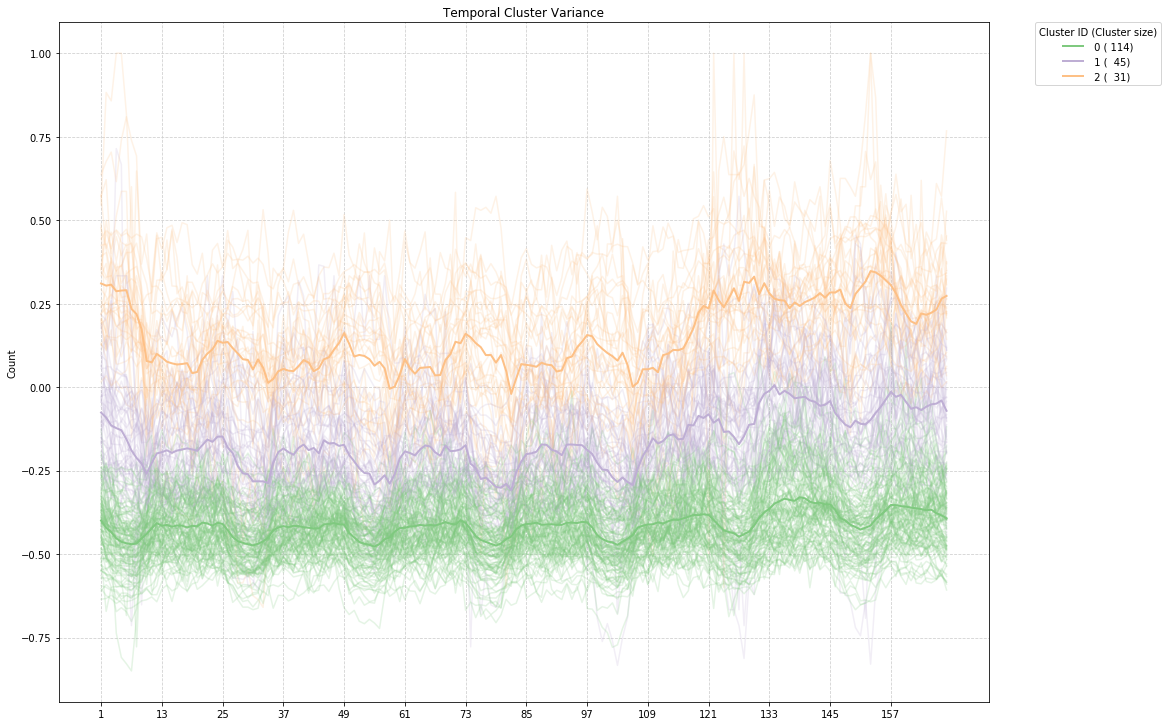

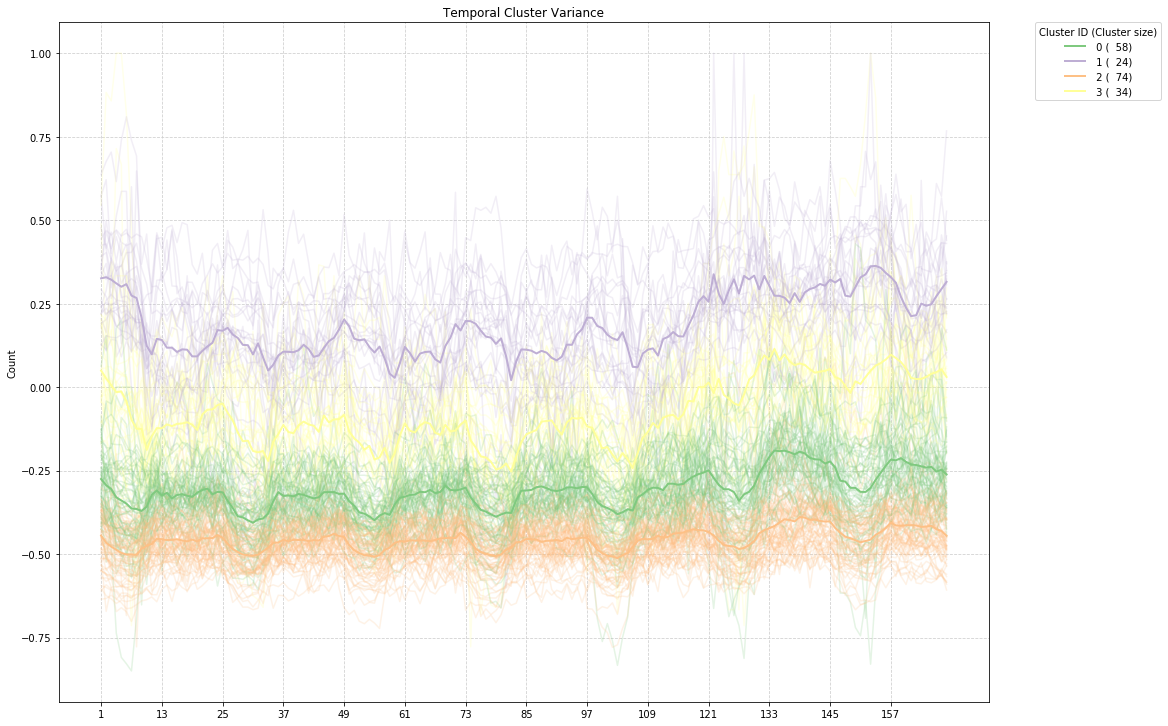

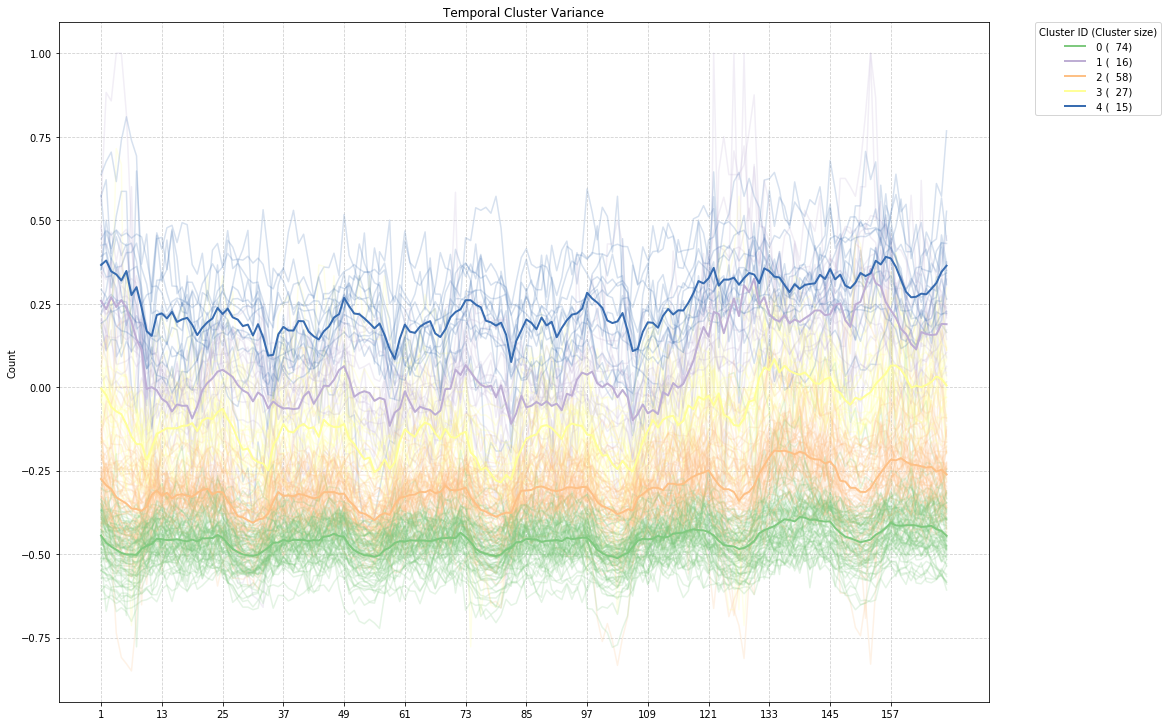

IndexError: list index out of range

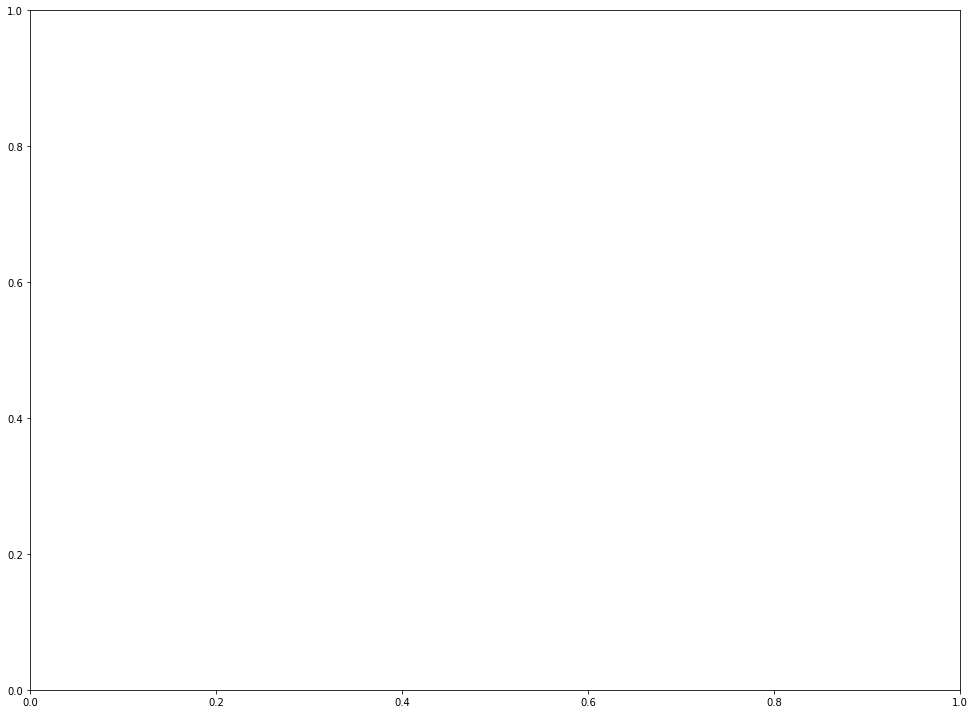

In [258]:
# for k in range(2,13):
# #     print(k)
# #     clust_id_col_name = 'Cluster ID (k={})'.format(k)
#     comparison = comparison.drop([clust_id_col_name], axis=1)
#     (comparison_clustered, comparison_centroids, comparison_cluster_sizes) = clusterize(comparison)
#     plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes)
    